In [1]:
from pycocotools.coco import COCO
import requests
import os 
import zipfile
import json
from pylabel import importer
import shutil

In [2]:
import fiftyone.zoo as foz #https://voxel51.com/docs/fiftyone/

# To download the COCO dataset for only the "person" classes
dataset2 = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=["person"],
    max_samples=10000,
)

Found annotations at '/home/theubuntu/fiftyone/coco-2017/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-train-10000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



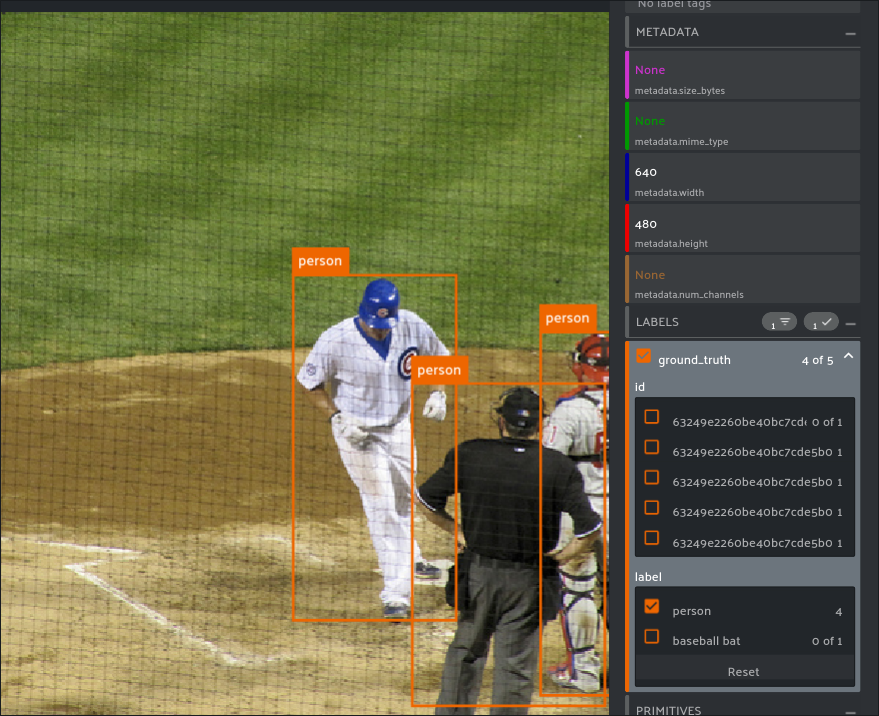

In [5]:
dataset2.iloc[0]

AttributeError: 'Dataset' object has no attribute 'iloc'

In [10]:
output_dir = "/home/theubuntu/ZedRos_CustomDetection/Dokuments/Abbildungen/examples"

In [12]:
label_fields = ["ground_truth"]  # for example

# Render the labels!
dataset2.draw_labels(output_dir, label_fields=label_fields)

Directory '/home/theubuntu/ZedRos_CustomDetection/Dokuments/Abbildungen/examples' already exists; outputs will be merged with existing files
   0% |/------------|     0/10000 [18.6ms elapsed, ? remaining, ? samples/s] 


KeyError: "Sample has no field 'label'"

In [111]:
f = open('/home/theubuntu/fiftyone/coco-2017/train/labels.json')
data = json.load(f)

In [112]:
for i in data['images']:
    temp_filename=i["file_name"]
    new_filename=temp_filename
    print(new_filename)

000000060623.jpg
000000005802.jpg
000000012448.jpg
000000079841.jpg
000000061181.jpg
000000001146.jpg
000000037675.jpg
000000085160.jpg
000000015827.jpg
000000052759.jpg
000000006005.jpg
000000038029.jpg
000000065227.jpg
000000046743.jpg
000000054088.jpg
000000007682.jpg
000000030255.jpg
000000069946.jpg
000000077184.jpg
000000014990.jpg
000000032965.jpg
000000042069.jpg
000000062060.jpg
000000064710.jpg
000000082680.jpg
000000062790.jpg
000000079380.jpg
000000016574.jpg
000000037038.jpg
000000034180.jpg
000000010442.jpg
000000010142.jpg
000000016497.jpg
000000041687.jpg
000000072944.jpg
000000065415.jpg
000000059202.jpg
000000041369.jpg
000000066412.jpg
000000054277.jpg
000000072833.jpg
000000045864.jpg
000000017707.jpg
000000066423.jpg
000000001369.jpg
000000053015.jpg
000000054796.jpg
000000053990.jpg
000000057387.jpg
000000065244.jpg
000000080172.jpg
000000049559.jpg
000000012543.jpg
000000039760.jpg
000000076292.jpg
000000016356.jpg
000000078707.jpg
000000048636.jpg
000000074369.j

In [113]:
path_to_annotations = "/home/theubuntu/fiftyone/coco-2017/train/labels.json"
path_to_images = ""

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=" ", name="BCCD_coco")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,000000060623.jpg,,60623,640,427,,,1.91,1.91,...,"[[1.91, 42.13, 84.25, 1.91, 219.24, 1.91, 253....",0,,,,1,person,person,,1
1,,000000060623.jpg,,60623,640,427,,,283.38,2.17,...,"[[408.69, 174.7, 400.98, 174.7, 386.52, 179.52...",0,,,,1,person,person,,1
2,,000000060623.jpg,,60623,640,427,,,411.87,127.67,...,"[[517.26, 213.6, 499.43, 210.35, 488.08, 206.3...",0,,,,50,spoon,kitchen,,1
3,,000000060623.jpg,,60623,640,427,,,413.54,237.06,...,"[[465.47, 352.47, 497.2, 350.54, 520.29, 339.0...",0,,,,51,bowl,kitchen,,1
4,,000000060623.jpg,,60623,640,427,,,560.67,35.85,...,"[[565.14, 63.78, 606.48, 46.47, 630.5, 37.53, ...",0,,,,46,wine glass,kitchen,,1


In [114]:
dataset2 = dataset.df
dataset2=dataset2[dataset2.cat_name == "person"]
dataset2.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,000000060623.jpg,,60623,640,427,,,1.91,1.91,...,"[[1.91, 42.13, 84.25, 1.91, 219.24, 1.91, 253....",0,,,,1,person,person,,1
1,,000000060623.jpg,,60623,640,427,,,283.38,2.17,...,"[[408.69, 174.7, 400.98, 174.7, 386.52, 179.52...",0,,,,1,person,person,,1
6,,000000060623.jpg,,60623,640,427,,,470.58,0.56,...,"[[594.47, 46.34, 603.22, 41.63, 601.2, 23.45, ...",0,,,,1,person,person,,1
13,,000000005802.jpg,,5802,640,479,,,15.04,73.03,...,"[[15.04, 471.48, 21.48, 462.89, 37.59, 453.22,...",0,,,,1,person,person,,1
14,,000000005802.jpg,,5802,640,479,,,391.68,179.40,...,"[[397.57, 257.78, 400.98, 255.61, 402.22, 252....",0,,,,1,person,person,,1


In [115]:
dataset.df=dataset2
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,000000060623.jpg,,60623,640,427,,,1.91,1.91,...,"[[1.91, 42.13, 84.25, 1.91, 219.24, 1.91, 253....",0,,,,1,person,person,,1
1,,000000060623.jpg,,60623,640,427,,,283.38,2.17,...,"[[408.69, 174.7, 400.98, 174.7, 386.52, 179.52...",0,,,,1,person,person,,1
6,,000000060623.jpg,,60623,640,427,,,470.58,0.56,...,"[[594.47, 46.34, 603.22, 41.63, 601.2, 23.45, ...",0,,,,1,person,person,,1
13,,000000005802.jpg,,5802,640,479,,,15.04,73.03,...,"[[15.04, 471.48, 21.48, 462.89, 37.59, 453.22,...",0,,,,1,person,person,,1
14,,000000005802.jpg,,5802,640,479,,,391.68,179.40,...,"[[397.57, 257.78, 400.98, 255.61, 402.22, 252....",0,,,,1,person,person,,1


In [128]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")

Number of images: 10000
Number of classes: 1


In [132]:
os.chdir ("/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels")


In [133]:
ls

all/


In [134]:
dataset.path_to_annotations = "/labels/"
dataset.export.ExportToYoloV5()[0]

'training/dataset.yaml'

In [ ]:
#Renames labels wiht a "1" infront of the name only, so we dont run in name issues with other dataset

In [135]:
path_labels="/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels/training/labels/"
files = os.listdir(path_labels)
for file in files:
    os.rename(os.path.join(path_labels, file), os.path.join(path_labels, ("1"+file)))

In [136]:

destination_path_labels="/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels/all" #moves labesl
src_labels = os.listdir(path_labels)
for label_name in src_labels:
    full_path_file= os.path.join(path_labels, label_name)
    if os.path.isfile(full_path_file):
        shutil.copy(full_path_file, destination_path_labels)

In [131]:
shutil.rmtree("/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels/training")#Removes old folder with labels

In [82]:
original_path_images="/home/theubuntu/fiftyone/coco-2017/train/data/"
destination_path_iamges="/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/images/All"

In [84]:
src_images = os.listdir(original_path_images) #Moves images
for image_name in src_images:
    full_path_file= os.path.join(original_path_images, image_name)
    if os.path.isfile(full_path_file):
        shutil.copy(full_path_file, destination_path_iamges)

In [ ]:
#Renames images wiht a "1" infront of the name only 

In [98]:

files = os.listdir(destination_path_iamges)
for  file in files:
    os.rename(os.path.join(destination_path_iamges, file), os.path.join(destination_path_iamges, ("1"+file)))


Could not connect session, trying again in 10 seconds



In [13]:
import fiftyone as fo
session = fo.launch_app(dataset2)


Could not connect session, trying again in 10 seconds

